In [1]:
import os

import numpy as np
from glob import glob
import matplotlib
import matplotlib.pylab as plt
import cv2

from utils import load_json, write_json, mkdir

%matplotlib inline

In [114]:
path = './newjson'
folder_list = os.listdir(path)
for i in folder_list:
    json_list = os.listdir(os.path.join(path, i))
    for j in json_list:
        json = load_json(os.path.join(path,i,j))
        keys = [x for x in json.keys() if x.endswith('.jpg')]
        for k in keys:
            for l in range(len(json[k]['location'])):
                try:
                    del json[k]['location'][l]['keypoints']
                except KeyError as e:
                    pass
        write_json(os.path.join(path,i,j), json)

In [27]:
def count_box(json):
    keys = [x for x in json.keys() if x.endswith('.jpg')]
    count_result = {'none': [], 'one': [], 'two': [], 'over': []}
    for i in keys:
        if json[i]['location'][0]['box'] is not None:
            length = len(json[i]['location'])
            if length == 1:
                count_result['one'].append(i)
            elif length == 2:
                count_result['two'].append(i)
            else:
                count_result['over'].append(i)
        else:
            count_result['none'].append(i)

    return count_result

In [28]:
test_label = load_json(os.path.join('./json_bak/real/dfdc_train_part_12/', file))
xx = count_box(test_label)
xx

{'none': ['keoycltjdq_00095.jpg',
  'keoycltjdq_00096.jpg',
  'keoycltjdq_00097.jpg',
  'keoycltjdq_00098.jpg',
  'keoycltjdq_00099.jpg',
  'keoycltjdq_00100.jpg',
  'keoycltjdq_00101.jpg',
  'keoycltjdq_00102.jpg',
  'keoycltjdq_00103.jpg',
  'keoycltjdq_00104.jpg',
  'keoycltjdq_00106.jpg',
  'keoycltjdq_00108.jpg',
  'keoycltjdq_00109.jpg',
  'keoycltjdq_00113.jpg',
  'keoycltjdq_00117.jpg',
  'keoycltjdq_00120.jpg',
  'keoycltjdq_00121.jpg',
  'keoycltjdq_00123.jpg',
  'keoycltjdq_00131.jpg',
  'keoycltjdq_00133.jpg',
  'keoycltjdq_00135.jpg',
  'keoycltjdq_00138.jpg',
  'keoycltjdq_00144.jpg',
  'keoycltjdq_00148.jpg',
  'keoycltjdq_00151.jpg',
  'keoycltjdq_00154.jpg',
  'keoycltjdq_00157.jpg',
  'keoycltjdq_00158.jpg',
  'keoycltjdq_00160.jpg',
  'keoycltjdq_00162.jpg'],
 'one': ['keoycltjdq_00001.jpg',
  'keoycltjdq_00002.jpg',
  'keoycltjdq_00003.jpg',
  'keoycltjdq_00004.jpg',
  'keoycltjdq_00005.jpg',
  'keoycltjdq_00006.jpg',
  'keoycltjdq_00007.jpg',
  'keoycltjdq_00008.jp

In [30]:
keys = [x for x in json.keys() if x.endswith('.jpg')]

In [45]:
box1 = json[keys[4]]['location'][0]['box']
box2 = json[keys[5]]['location'][0]['box']

np.linalg.norm(np.array(box1)-np.array(box2))
a = np.linalg.norm(np.array(box1[0:2])-np.array(box2[0:2]))
b = np.linalg.norm(np.array(box1[2:4])-np.array(box2[2:4]))

print(a+b)

16.49440615792779


ntmrwnzvzt.json


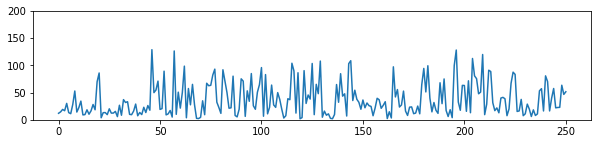

lawtlbhflv.json


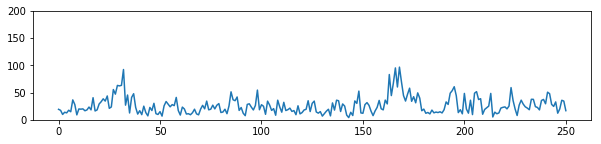

yuxexfmmww.json


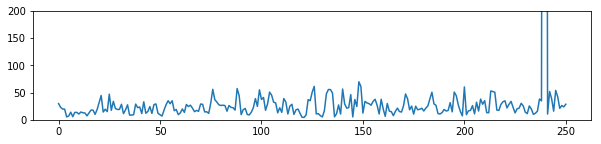

ykxuygbjwe.json


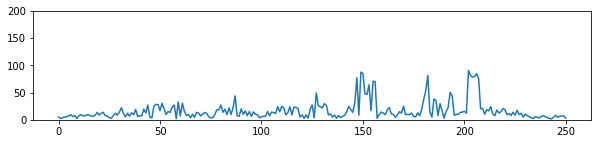

dlyolaisdz.json


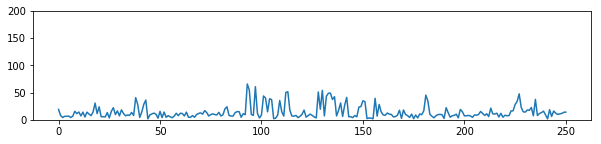

ozhhaoydlq.json


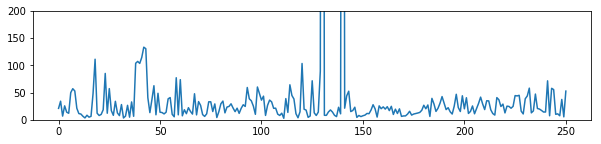

shvaqyduzg.json


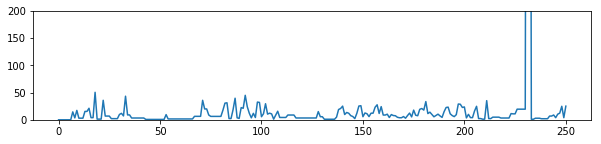

odzhpbyvkx.json


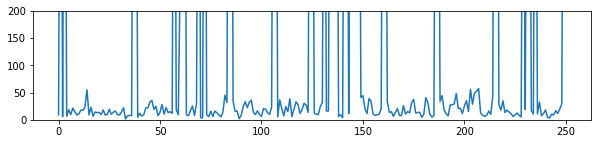

jhtafcntss.json


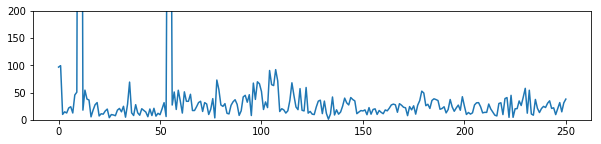

chjhbsexls.json


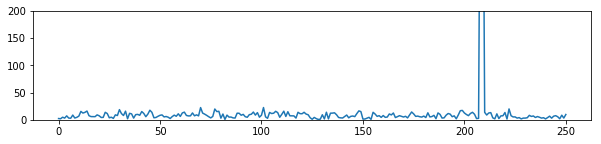

keoycltjdq.json


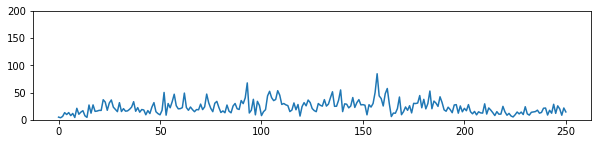

myqotqhdwv.json


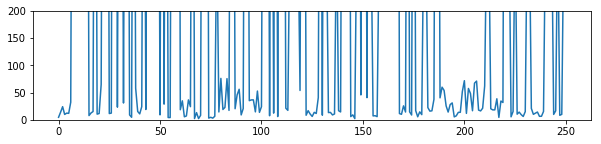

yqnsdfwelt.json


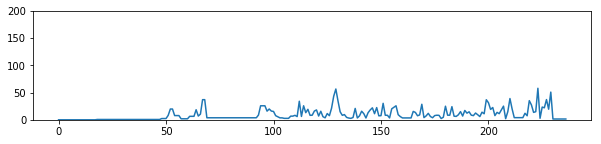

kvbsmrjsak.json


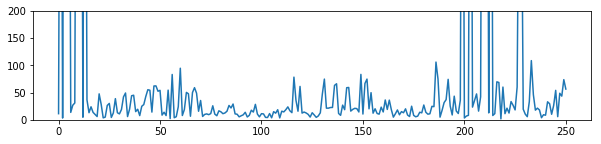

qtyqskkgly.json


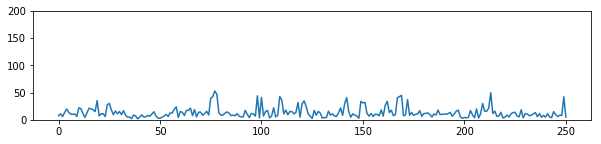

In [57]:
json_path = './fjson/dfdc_train_part_12/'
json_list = glob(os.path.join(json_path, '*.json'))

for i in json_list[:50]:
    json = load_json(i)
    keys = [x for x in json.keys() if x.endswith('.jpg')]
    diff = []
    for j in range(len(keys)-1):
        box1 = json[keys[j]]['location'][0]['box']
        box2 = json[keys[j+1]]['location'][0]['box']
        
        if box1 != None and box2 != None:
            a = np.linalg.norm(np.array(box1[0:2])-np.array(box2[0:2]))
            b = np.linalg.norm(np.array(box1[2:4])-np.array(box2[2:4]))

            diff.append(a+b)
    try:
        if max(diff) >= 50:
            print(i.split('/')[-1])
            plt.figure(figsize=(10, 2))
            plt.ylim(0, 200)
            plt.plot(diff)
            plt.show()
    except ValueError as e:
        print(i)

ntmrwnzvzt.json


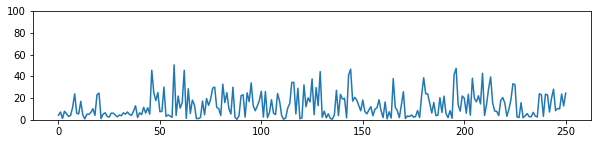

yuxexfmmww.json


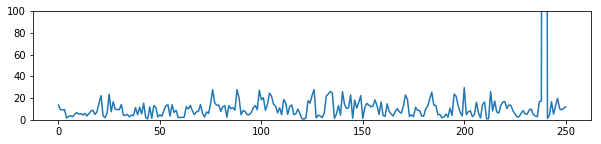

ozhhaoydlq.json


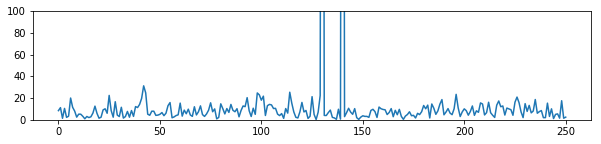

shvaqyduzg.json


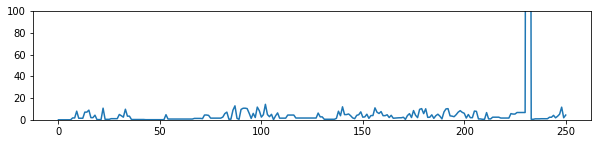

odzhpbyvkx.json


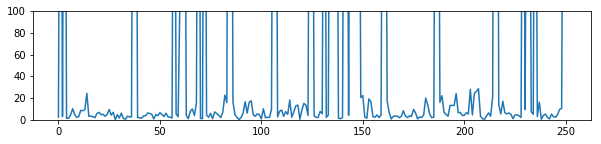

jhtafcntss.json


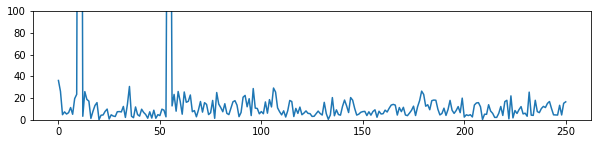

chjhbsexls.json


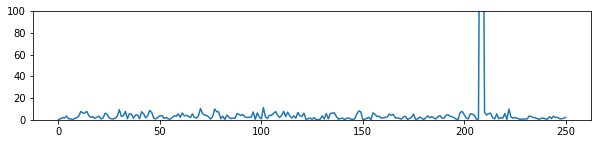

myqotqhdwv.json


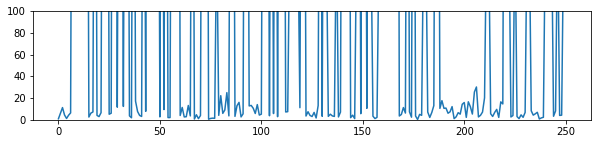

kvbsmrjsak.json


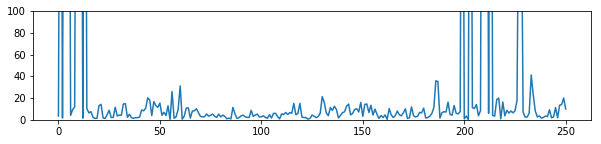

In [62]:
json_path = './fjson/dfdc_train_part_12/'
json_list = glob(os.path.join(json_path, '*.json'))

for i in json_list[:50]:
    json = load_json(i)
    keys = [x for x in json.keys() if x.endswith('.jpg')]
    diff = []
    for j in range(len(keys)-1):
        box1 = json[keys[j]]['location'][0]['box']
        box2 = json[keys[j+1]]['location'][0]['box']
        
        if box1 != None and box2 != None:
            center1 = np.array([(box1[0]+box1[2])/2, (box1[1]+box1[3])/2])
            center2 = np.array([(box2[0]+box2[2])/2, (box2[1]+box2[3])/2])
            
            a = np.linalg.norm(center1-center2)

            diff.append(a)
    try:
        if max(diff) >= 50:
            print(i.split('/')[-1])
            plt.figure(figsize=(10, 2))
            plt.ylim(0, 100)
            plt.plot(diff)
            plt.show()
    except ValueError as e:
        print(i)

In [32]:
max(diff)

53.03444497201856

In [154]:
file = 'aayrffkzxn.json'

test_label = load_json(os.path.join('./newjson/dfdc_train_part_0/', file))
keys = [x for x in test_label.keys() if x.endswith('.jpg')]
mkdir(os.path.join('./image', file[:-5]))

for i in keys:
    box = test_label[i]['location'][0]['box']
    img = cv2.imread(os.path.join('/ssd2/dfdc/dfdc_train_part_0/', i))
    if box is not None:
        for j in range(len(test_label[i]['location'])):
            box = np.array(test_label[i]['location'][j]['box'], np.int32)

            cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), (0, 0, 255))


        save_path = os.path.join('./image/', file[:-5], i)

        cv2.imwrite(save_path, img)

./fjson/dfdc_train_part_0


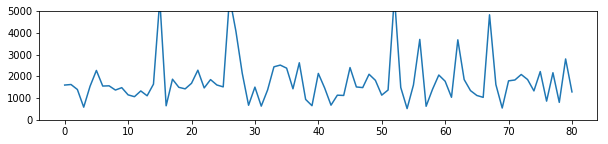

./fjson/dfdc_train_part_1


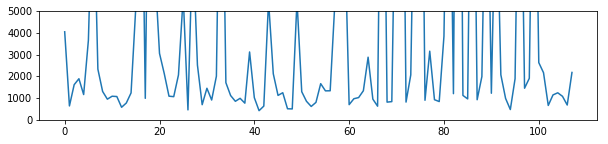

iedsgxqfuz.json
orblnqzpra.json
kpnakfmmlh.json
lyukjvgwoa.json
yhylappzid.json
vvfszaosiv.json
fneqiqpqvs.json
hhhvnhhqsc.json
gzbagbdubm.json
ztyuiqrhdk.json
ypbtpunjvm.json
opsgvfjlgh.json
gsshxchgqv.json
nlbeldnhpa.json
rmhsahyvta.json
jpvkoxrueh.json
ywauoonmlr.json
./fjson/dfdc_train_part_10


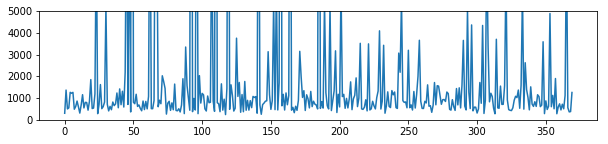

usjebzgmce.json
kxmyydyoiy.json
lisahsoohl.json
negcjjhsnw.json
gwhetnxtmd.json
ufeeoveuks.json
tgulamvlno.json
dissdcomdy.json
qosizsmowb.json
acvpuukcwl.json
otyhadpkmz.json
ebcogwdmdf.json
./fjson/dfdc_train_part_11


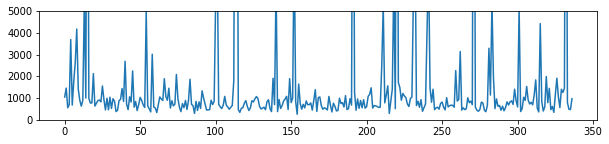

blbvdywnbk.json
gbifwixlyi.json
qifhccqwpi.json
frczmdfzza.json
zjhmmibena.json
ztutsnlhtr.json
zesnphumru.json
./fjson/dfdc_train_part_12


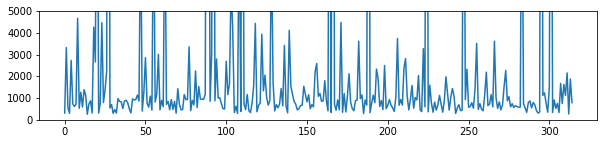

odzhpbyvkx.json
myqotqhdwv.json
zmmdjdpjra.json
wqnlooubux.json
nfautgslrd.json
yoonfdohwq.json
bglsrppmtk.json
pejtahlmir.json
ivctdtckcn.json
eavapuimmt.json
mpbvaumtlo.json
swbgoxjmbr.json
eaqxklixlu.json
tlaxtosyoi.json
sejttfsefa.json
eljyfxrymd.json
./fjson/dfdc_train_part_13


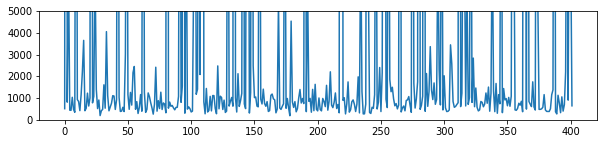

rfvqellwek.json
yaivbfubpr.json
eswsjbajnw.json
vxcazliomf.json
xniocvzamo.json
tybdsmbofg.json
rujvxjnuya.json
wjsftxrqzj.json
qxhkrngfyx.json
lwyxnywcvs.json
ibvumqguch.json
ngheregwar.json
rmcuoghsmr.json
tvxpwsknsi.json
msqkjfjfyt.json
tykrhbejbe.json
lrqhmruflh.json
ejkiprtgkr.json
jqfnkkjjea.json
hkjnztvsmk.json
gdlctdrxzs.json
qwcismrvgr.json
wiuyswqzep.json
xperivyoby.json
zdpmjrfctz.json
yrmbwlxunm.json
nckjztxpfb.json
jzjibrcwkj.json
cggzjocxdk.json
trbdicpeov.json
gqatosifpz.json
zglrhmwxic.json
fejjwuoosa.json
xpivslxbup.json
dhgvsdotga.json
iwlughnueg.json
wnzfpgjkte.json
cvznwxifib.json
ldlxxcfcvy.json
laxoxhpnbu.json
amljqllcwj.json
tfyyefqpfs.json
osaqfchczp.json
nddepqnpvd.json
dvuftytmvn.json
bzvhtmpwbd.json
dnpugxwblh.json
wvpxqmpjya.json
./fjson/dfdc_train_part_14


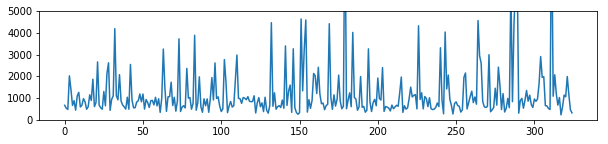

./fjson/dfdc_train_part_15


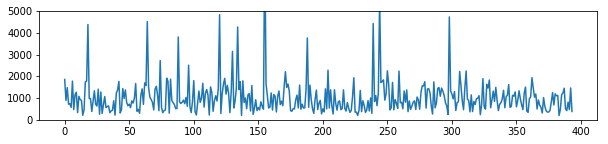

./fjson/dfdc_train_part_16


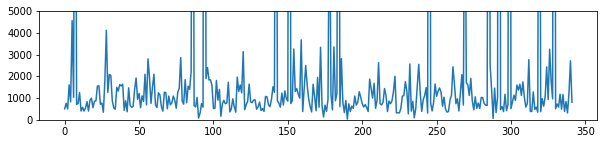

oisiyudtkv.json
rvnsxxxcde.json
uvdzymytyr.json
ydfntnxriy.json
gpgcmhsuqn.json
vberwozvmz.json
upvqtkmdvp.json
ocsmirgrak.json
whkrlhuqyg.json
apbtqpxkpt.json
nvirvscqzx.json
ifgwfyulwo.json
fxqbtvmyaw.json
zkvzrmwyab.json
./fjson/dfdc_train_part_17


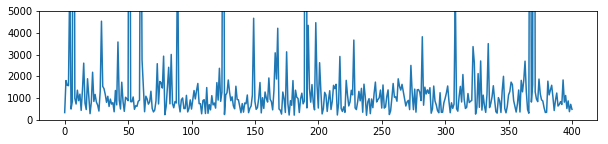

ntbkqlecod.json
kaaypzytle.json
ytgzznajup.json
ncwrbwyubb.json
uzsnqddqem.json
ezabudfqms.json
mwoleudtoq.json


In [107]:
path = './fjson/'
folders = glob(os.path.join(path, 'dfdc*'))
folders = sorted(folders)
t = 0
for i in folders[:10]:
    jsons = glob(os.path.join(i, '*.json'))
    diff = {}
    for j in jsons:
        json = load_json(j)
        box_num = count_box(json)
        
        
        center_diff = 0
        if len(box_num['one']) > len(box_num['two']):
            keys = [x for x in json.keys() if x.endswith('.jpg')]
            
            for k in range(len(keys)-1):
                box1 = json[keys[k]]['location'][0]['box']
                box2 = json[keys[k+1]]['location'][0]['box']

                if box1 != None and box2 != None:
                    center1 = np.array([(box1[0]+box1[2])/2, (box1[1]+box1[3])/2])
                    center2 = np.array([(box2[0]+box2[2])/2, (box2[1]+box2[3])/2])

                    a = np.linalg.norm(center1-center2)
                    center_diff+=a
            diff[j.split('/')[-1]] = int(center_diff)
    print(i)
    
    plt.figure(figsize=(10, 2))
    plt.ylim(0,5000)
    plt.plot(diff.values())
    plt.show()
    
    for key, val in diff.items():    # for name, age in dictionary.iteritems():  (for Python 2.x)
        if val > 10000:
            print(key)

In [115]:
path = './newjson/'
folders = glob(os.path.join(path, 'dfdc*'))
folders = sorted(folders)
n = 0
for i in folders[:10]:
    jsons = glob(os.path.join(i, '*.json'))
    for j in jsons:
        json = load_json(j)
        box_num = count_box(json)
        
        if len(box_num['over']) > 0:
            print(j)
            n += len(box_num['over'])
print(n)


./newjson/dfdc_train_part_0/aayrffkzxn.json
./newjson/dfdc_train_part_0/gcdtglsoqj.json
./newjson/dfdc_train_part_0/khtwrijuqn.json
./newjson/dfdc_train_part_0/fgobmbcami.json
./newjson/dfdc_train_part_0/jvtjxreizj.json
./newjson/dfdc_train_part_0/exxqlfpnbz.json
./newjson/dfdc_train_part_0/sylnrepacf.json
./newjson/dfdc_train_part_1/iedsgxqfuz.json
./newjson/dfdc_train_part_1/kpnakfmmlh.json
./newjson/dfdc_train_part_1/vvfszaosiv.json
./newjson/dfdc_train_part_1/hhhvnhhqsc.json
./newjson/dfdc_train_part_1/ztyuiqrhdk.json
./newjson/dfdc_train_part_1/ypbtpunjvm.json
./newjson/dfdc_train_part_1/opsgvfjlgh.json
./newjson/dfdc_train_part_1/jpvkoxrueh.json
./newjson/dfdc_train_part_10/rzpsyofzaa.json
./newjson/dfdc_train_part_10/qdscynormj.json
./newjson/dfdc_train_part_10/kxmyydyoiy.json
./newjson/dfdc_train_part_10/lisahsoohl.json
./newjson/dfdc_train_part_10/rcfmpfkglb.json
./newjson/dfdc_train_part_10/tdsfqvucbj.json
./newjson/dfdc_train_part_10/gwhetnxtmd.json
./newjson/dfdc_train_part

In [150]:
def cal_center(json):
    frame = []
    idx = []
    center = []
    
    keys = [x for x in json.keys() if x.endswith('.jpg')]
            
    for i in keys:
        if json[i]['location'][0]['box'] is not None:
            boxes = json[i]['location']
            for j in range(len(json[i]['location'])):
                box = boxes[j]['box']
                loc = np.array([(box[0]+box[2])/2, (box[1]+box[3])/2])     
                frame.append(i)
                idx.append(j)
                center.append(loc)
    return frame, idx, np.array(center)

515.0331241147527

In [182]:
json = load_json('./newjson/dfdc_train_part_0/wfzjxzhdkj.json')
a, b, c= cal_center(json)

img = cv2.imread('/ssd2/dfdc/dfdc_train_part_0/wfzjxzhdkj_00001.jpg')

for i in c:
    cv2.circle(img, (int(i[0]), int(i[1])), radius=2, color=(0, 0, 255), thickness=2)

cv2.circle(img, (int(np.average(c[:,0])), int(np.average(c[:,1]))), radius=2, color=(255, 0, 0), thickness=2)
cv2.imwrite('./wfzjxzhdkj.jpg', img)

True

In [178]:
print(np.linalg.norm(c[0]-c[25]))
c[0], c[25]

213.20299368975208


(array([648.54052734, 604.02355957]), array([517.21160889, 771.97662354]))

In [165]:
maxx = 0

img = cv2.imread('/ssd2/dfdc/dfdc_train_part_0/aayrffkzxn_00001.jpg')
avg = np.array(np.average(c[:,0]), np.average(c[:,1]))

for i in c:
    temp = np.linalg.norm(i-avg)
    if 500<temp<700:
        if temp>maxx:
            maxx = temp
            cv2.circle(img, (int(i[0]), int(i[1])), radius=2, color=(0, 0, 255), thickness=2)
            print(maxx)
cv2.circle(img, (int(np.average(c[:,0])), int(np.average(c[:,1]))), radius=2, color=(255, 0, 0), thickness=2)
cv2.imwrite('./aaaaaa_1.jpg', img)

612.5646566054585
661.6461093370698


True

In [ ]:
path = './newjson/'
folders = glob(os.path.join(path, 'dfdc*'))
folders = sorted(folders)

for i in folders[:1]:
    jsons = glob(os.path.join(i, '*.json'))
    
    for j in jsons:
        json = load_json(j)
        frame, idx, coor = cal_center(json)
        
        for k,l,m in zip(frame, idx, coor):
            if

In [186]:
aa

-1